## Estadística Aplicada

**Integrantes del equipo:**

- Javier Bazaldua Parga 
1960046

- Angie Paola Gonzalez Garza
1860483

- Marcela Espinoza Sanchez
1918509

- Maria Guadalupe Valerio Ramos
1886503

- Francisco Humberto Villegas Reyna
1731722

**Grupo:** 43

**Nombre del equipo:** Los amsiosos

In [2]:
## librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm
from statsmodels.tsa.api import seasonal_decompose

# Introducción
**IGEA**, es   el Indicador Global de la Actividad Económica.

Trabajaremos con el reporte de **IGEA** , desde el mes de **enero de 1993** hasta el cierre del mes de **agosto  de 2023**.

## 1. Añadirás una primera parte a la notebook llamada introducción. Hablaras de la serie de tiempo que te toco analizar: ¿qué mide? ¿la frecuencia de los datos? ¿se observa alguna tendencia? Y se puede añadir la gráfica de la serie.

In [4]:
# importacion de los datos
Igae_datos=pd.read_excel('IGAE.xlsx')

In [5]:
Igae_datos

,mes,IGAE
0,1993/01,55.434714
1,1993/02,56.456934
2,1993/03,58.900516
3,1993/04,57.135808
4,1993/05,57.891816
...,...,...
363,2023/04,100.490496
364,2023/05,106.113244
365,2023/06,104.550513
366,2023/07,102.780837


In [6]:
#ponemos la columna de periodos en formato fecha  
Igae_datos['mes'] = pd.to_datetime(Igae_datos['mes'], format = '%Y/%m')


In [7]:
# La asignamos como index
Igae_datos = Igae_datos.set_index('mes')


In [8]:
# Asignamos frecuencia.
Igae_datos=Igae_datos.asfreq('MS')

In [9]:
Igae_datos

,IGAE
mes,
1993-01-01,55.434714
1993-02-01,56.456934
1993-03-01,58.900516
1993-04-01,57.135808
1993-05-01,57.891816
...,...
2023-04-01,100.490496
2023-05-01,106.113244
2023-06-01,104.550513


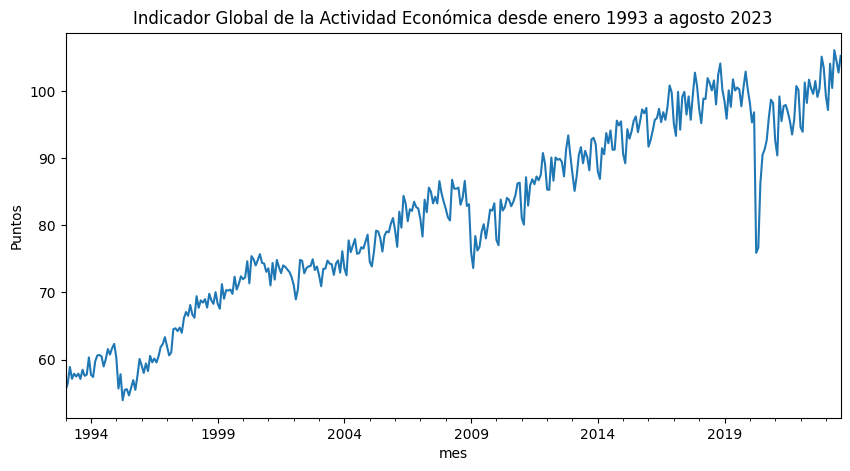

In [42]:
# Realizamos gráfico.
# Visualizamos los datos en un grafica.
Igae_datos['IGAE'].plot(figsize=(10,5))
plt.title('Indicador Global de la Actividad Económica desde enero 1993 a agosto 2023')
plt.ylabel('Puntos');

Primero, apreciamos una grafica con una tendencia creciente o positiva, desde el año de 1993, y no fue hasta 2020 que tuvo una considerable variación en su tendencia, cuando disminuyeron drásticamente en el mes de abril de este año por la pandemia por COVID-19.

## 2. Comenta acerca de si se observa cierta estacionalidad en la serie, en que meses aumenta la variable ¿por qué?, en qué meses disminuye la variable  ¿por qué? ¿hay efecto estacional?.

Podemos notar que la serie si presenta un efecto estacional, esta serie aumenta en todos los años en el mes de diciembre y disminuye en el mes de febrero,Por lo que si hay efecto estacional.

## 3. Uno los propósitos fundamentales del análisis de series de tiempo es el pronóstico , es decir, “anticipar valores futuros de la variable”. Comenta para quién es importante conocer el pronóstico de la serie de tiempo que analizaras  y por qué es importante conocer el pronóstico de dicha serie de tiempo.

En la serie podemos observar que si tiene componente estacional, ya que en el mes de diciembre aumenta la variable esto dado por la alta productividad de las empresas en este mes debido al incremento de las ventas provocado por las festividades en este mes, por otro lado la variable disminuye en el mes de enero y febrero por el efecto de la cuesta de enero dado que en diciembre  se acumulan las deudas, cuentas por pagar y el precio de la canasta básica aunmeta).

## 4. Añade las estadísticas descriptivas de la serie de tiempo.

In [11]:
# Estadísticas descriptivas de la serie.
Igae_datos.describe()

,IGAE
count,368.000000
mean,81.476113
std,13.700711
min,53.941797
25%,72.341739
50%,82.281634
75%,93.917631
max,106.113244


## 5.Para  ver  mejor  el  comportamiento  de  la  variable  aplica  un  promedio móvil centrado.

In [12]:
# Creamos una columna de promedio movil centrado a 7 meses
Igae_datos['PMC7']=Igae_datos['IGAE'].rolling(7,center=True).mean()

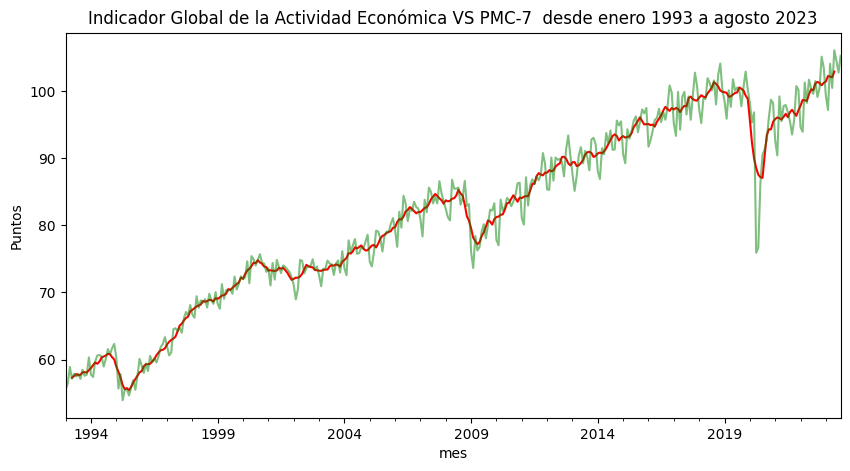

In [41]:
Igae_datos['PMC7'].plot(figsize=(10,5), color='red')
Igae_datos['IGAE'].plot(color='green',alpha=0.5)
plt.title('Indicador Global de la Actividad Económica VS PMC-7  desde enero 1993 a agosto 2023')
plt.ylabel('Puntos');

## 6. Utiliza la descomposición estacional, para obtener el componente estacional, y la serie desestacionalizada.

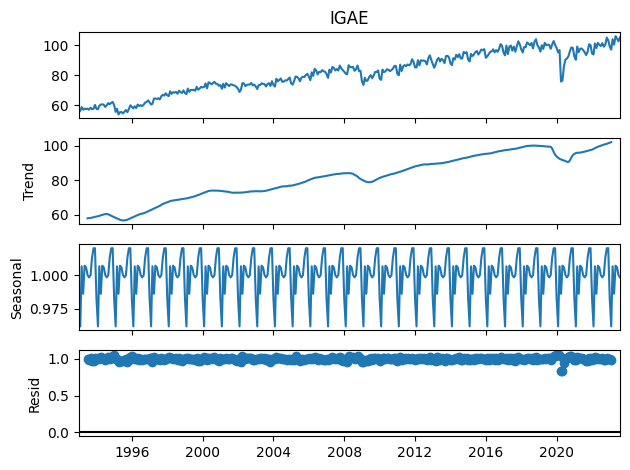

In [14]:
# Extraemos el componente estacional de la serie.
results = seasonal_decompose(Igae_datos['IGAE'], model='mul')
results.plot();

In [15]:
# Accedemos al componente estacional.
results.seasonal

mes
1993-01-01    0.982651
1993-02-01    0.962107
1993-03-01    1.006404
1993-04-01    0.986142
1993-05-01    1.006866
                ...   
2023-04-01    0.986142
2023-05-01    1.006866
2023-06-01    1.005587
2023-07-01    0.999981
2023-08-01    0.998249
Freq: MS, Name: seasonal, Length: 368, dtype: float64

In [16]:
# Accedemos al componente estacional.
results.seasonal.head(10)

mes
1993-01-01    0.982651
1993-02-01    0.962107
1993-03-01    1.006404
1993-04-01    0.986142
1993-05-01    1.006866
1993-06-01    1.005587
1993-07-01    0.999981
1993-08-01    0.998249
1993-09-01    0.999828
1993-10-01    1.012667
Freq: MS, Name: seasonal, dtype: float64

In [17]:
# Obtenemos la serie desestacionalizada.
Igae_datos['serie desestacionalizada'] = Igae_datos['IGAE']/results.seasonal

Text(0, 0.5, 'IGAE.')

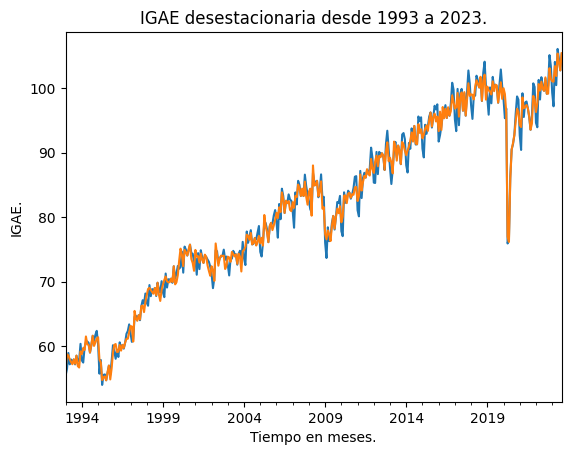

In [18]:
# Graficamos la serie desestacionalizada
Igae_datos['IGAE'].plot();
Igae_datos['serie desestacionalizada'].plot();
plt.title('IGAE desestacionaria desde 1993 a 2023.')
plt.xlabel('Tiempo en meses.')
plt.ylabel('IGAE.')

## 7. Utiliza la serie para hacer el análisis ARIMA.

In [20]:
Igae_datos.head()

,IGAE,PMC7,serie desestacionalizada
mes,,,
1993-01-01,55.434714,NaN,56.413448
1993-02-01,56.456934,NaN,58.680489
1993-03-01,58.900516,NaN,58.525720
1993-04-01,57.135808,57.313942,57.938713
1993-05-01,57.891816,57.555257,57.497035


In [22]:
serie_original = pd.read_excel('IGAE.xlsx')

In [24]:
#prueba dickeyFuller
prueba_adf= adfuller(serie_original['IGAE'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.8

No rechazamos $H_0$ significa que la serie original es una serie no estacionaria

In [25]:
# primeras diferencias
serie_original['IGAE_diff'] = serie_original['IGAE'].diff()

Rechazamos $H_0$ las primeras diferencias de la serie original son un proceso estacionario



In [26]:
# La variable relacionada a la fecha hacerla index y darle formato año/dia
serie_original['mes']=pd.to_datetime(serie_original['mes'], format='%Y/%m')
serie_original=serie_original.set_index('mes')
serie_original=serie_original.asfreq('MS')

In [27]:
##determinar el orden del SARIMA
arimaorder_aic = pm.auto_arima(serie_original['IGAE'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              information_criterion= 'aic',
              seasonal=False)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)>

## 8. Realiza una prueba de raíz unitaria para verificar si este proceso es estacionario (sino es estacionario conviértelo en estacionario).

In [28]:
## prueba de raíz estacionaria
prueba_adf=adfuller(Igae_datos['IGAE'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.8

In [29]:
alpha =0.05

if prueba_adf[1] < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

No rechazamos Ho, La serie es No estacionaria


In [30]:
## 1ras diferencias
Igae_datos['IGAE_diff']=Igae_datos['IGAE'].diff()


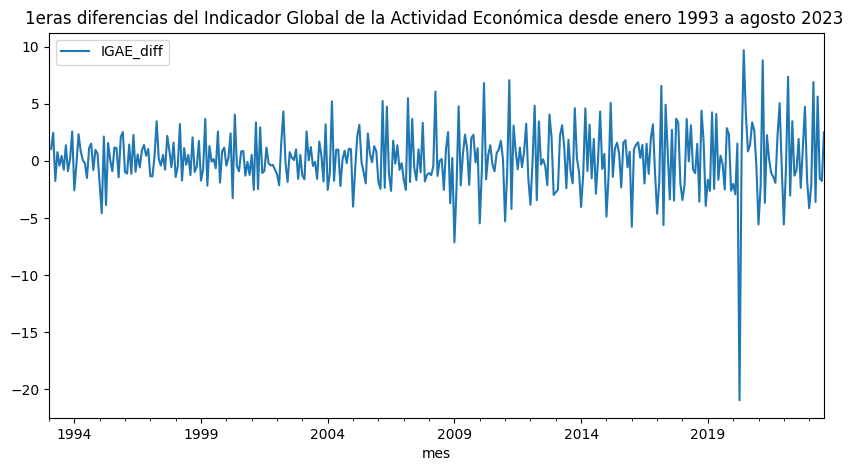

In [31]:
Igae_datos['IGAE_diff'].plot(figsize=(10,5))
plt.title('1eras diferencias del Indicador Global de la Actividad Económica desde enero 1993 a agosto 2023 ')
plt.legend();

In [32]:
## prueba de raiz unitaria a las 1ras diferencias
prueba_adf1=adfuller(Igae_datos['IGAE_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.0

In [33]:
if pvalue1 < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

rechazamos Ho, La serie es estacionaria


## 9. Con el proceso estacionario, realiza las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF)  y señala como se interpretan y ¿qué tipo de proceso es tu serie de tiempo AR(p), MA(q) o ARMA(p,q)?

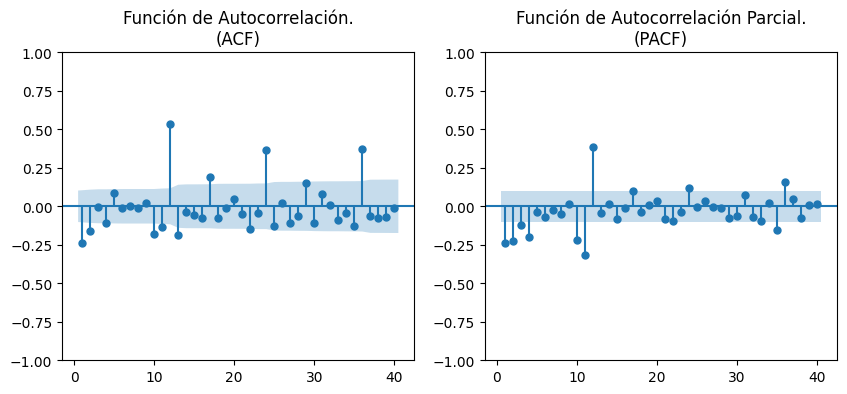

In [34]:
## graficas de autocorrelacion
ig, ax=plt.subplots(1,2,figsize=(10,4))

#1er 
plot_acf(Igae_datos['IGAE_diff'].dropna(), zero=False, lags=40,ax=ax[0], title = "Función de Autocorrelación.\n(ACF)")
ax[1].set_ylim(-1,1)


##2da
plot_pacf(Igae_datos['IGAE_diff'].dropna(), zero=False, lags=40,ax=ax[1], title = "Función de Autocorrelación Parcial.\n(PACF)")
ax[0].set_ylim(-1,1)
plt.show();

## 10. Utilizando el código de ejemplo para probar distintas combinaciones del modelo prueba varias combinaciones y elige un criterio para seleccionar el  modelo, ya sea el criterio de akaike (AIC) o el criterio bayesiano de  información (BIC).


In [35]:
# identificar el orden del arima, aic, bic
print('AIC ',pm.auto_arima(Igae_datos['IGAE'],start_p=1, start_q=1,max_p=10,max_q=10,
              seasonal=True,m=12,start_P=1, start_Q=1,max_P=10, max_Q=10,
              ic='aic',))
print('BIC ',pm.auto_arima(Igae_datos['IGAE'],start_p=1, start_q=1,max_p=10,max_q=10,
              seasonal=True,m=12,start_P=1, start_Q=1,max_P=10, max_Q=10,
              ic='bic',))

AIC   ARIMA(1,1,1)(6,0,1)[12]          
BIC   ARIMA(1,1,1)(6,0,1)[12]          


## 11. Estima el modelo ARMA que hayas elegido e interpreta los coeficientes.

In [36]:
model=ARIMA(Igae_datos['IGAE'], order=(1,1,1), seasonal_order=(6,0,1,12))

results=model.fit()
print(results.summary())

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                    SARIMAX Results                                     
Dep. Variable:                             IGAE   No. Observations:                  368
Model:             ARIMA(1, 1, 1)x(6, 0, 1, 12)   Log Likelihood                -753.375
Date:                          Wed, 15 Nov 2023   AIC                           1526.750
Time:                                  19:26:44   BIC                           1565.803
Sample:                              01-01-1993   HQIC                          1542.267
                                   - 08-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8341      0.030     27.641      0.000       0.775       0.893
ma.L1         -0.9698      0.023    -42.901      0.

## 12 Utiliza el modelo estimado para hacer pronósticos, y pronóstica uno, dos, tres, cuatro y cinco periodos.  Recuerda que el pronóstico tiene que estar en la escala de la variable origin

In [37]:
# Realizamos un pronóstico.
results.predict(368,372)

2023-09-01    102.570688
2023-10-01    105.171907
2023-11-01    107.506823
2023-12-01    105.052628
2024-01-01    101.950703
Freq: MS, Name: predicted_mean, dtype: float64

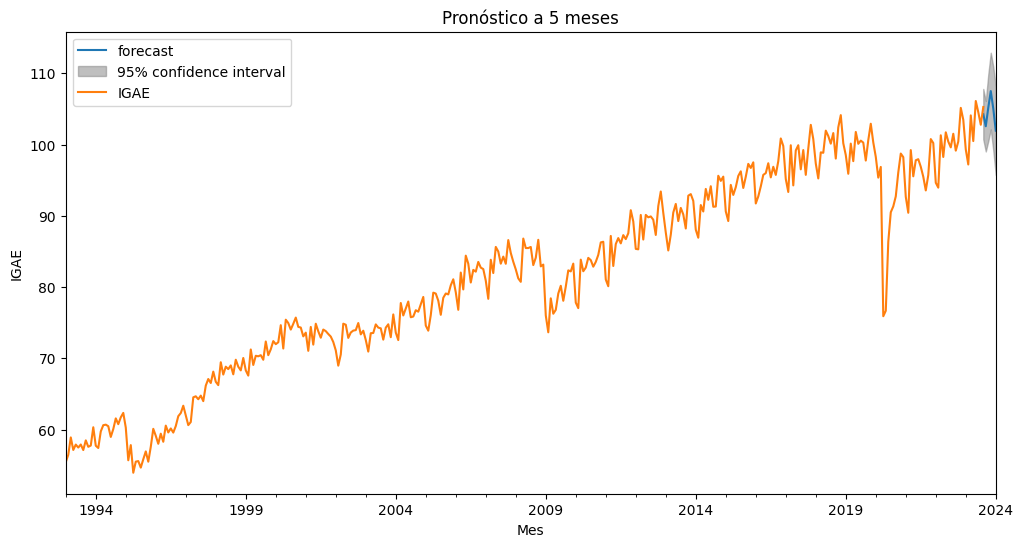

In [38]:
## Grafica del pronostico futuro

plot_predict(results, '2023-08-01', '2024-01-01')
Igae_datos['IGAE'].plot(figsize=(12,6));
plt.xlim('1993-01-01', '2024-01-01') 
plt.title('Pronóstico a 5 meses')
plt.legend(loc='upper left')
plt.ylabel('IGAE')
plt.xlabel('Mes')
plt.legend();

In [39]:
pronostico = [results.predict('2023-08-01','2024-01-01')]
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

inicio = '2023-08-01'
fin = '2024-01-01'
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

# Juntarlos en un DF
df_igae = pd.DataFrame({
    'pronostico_pasajeros':pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})

print(f'Pronostico del de los si Igae guientes 5 meses:\n\n{df_igae.round(2)}')

Pronostico del de los si Igae guientes 5 meses:

            pronostico_pasajeros  limite inferior  limite superior
2023-09-01                102.57            99.03           106.11
2023-10-01                105.17           100.49           109.85
2023-11-01                107.51           102.12           112.89
2023-12-01                105.05            99.19           110.92
2024-01-01                101.95            95.74           108.16
